<a href="https://colab.research.google.com/github/Insulin-bangkit-2022/deeplearningmethod/blob/main/Capstone_Deep_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT LIBRARIES**

In [27]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
import os
import pickle
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from keras.models import load_model
%matplotlib inline

**Import Diabetes Dataset from Kaggle**

In [28]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/Shared drives/Capstone Project/Product Based"

In [ ]:
#changing the working directory
%cd /content/gdrive/Shared drives/Capstone Project/Product Based

/content/gdrive/Shared drives/Capstone Project/Product Based


In [ ]:
!kaggle datasets download -d andrewmvd/early-diabetes-classification

early-diabetes-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


**Read Diabetes Dataset**

In [35]:
data = pd.read_csv('diabetes_data.csv', delimiter = ';')
print (data.shape)
data

(520, 17)


,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,Female,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,Female,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,Female,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [36]:
data["gender"] = data["gender"].apply({"Male":1, "Female":0}.get)
data.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


Plotting Heat Map

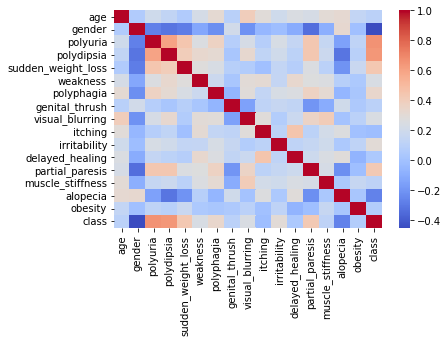

In [37]:
tc = data.corr()
sns.heatmap(tc,annot = False,cmap="coolwarm")

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   age                 520 non-null    int64
 1   gender              520 non-null    int64
 2   polyuria            520 non-null    int64
 3   polydipsia          520 non-null    int64
 4   sudden_weight_loss  520 non-null    int64
 5   weakness            520 non-null    int64
 6   polyphagia          520 non-null    int64
 7   genital_thrush      520 non-null    int64
 8   visual_blurring     520 non-null    int64
 9   itching             520 non-null    int64
 10  irritability        520 non-null    int64
 11  delayed_healing     520 non-null    int64
 12  partial_paresis     520 non-null    int64
 13  muscle_stiffness    520 non-null    int64
 14  alopecia            520 non-null    int64
 15  obesity             520 non-null    int64
 16  class               520 non-null    int64
dt

**Split the Dataset Into Training and Test Set**

In [39]:
x = data[data.columns[:-1]]
y = data[data.columns[-1]]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.15,random_state = 10)
print(x_train)
print(y_train)

     age  gender  polyuria  polydipsia  sudden_weight_loss  weakness  \
260   33       1         0           1                   0         0   
184   48       0         1           1                   1         0   
172   60       1         1           0                   0         0   
193   36       1         1           0                   0         1   
154   62       1         1           0                   0         1   
..   ...     ...       ...         ...                 ...       ...   
123   47       1         0           1                   0         0   
369   47       1         0           0                   0         0   
320   65       0         0           0                   0         1   
125   55       1         1           1                   1         1   
265   28       0         0           0                   0         0   

     polyphagia  genital_thrush  visual_blurring  itching  irritability  \
260           0               0                0        0   

**Training Dataset**

In [41]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(units = 128, activation = "relu"),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(units = 32, activation = "relu"),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(units = 1,activation = "sigmoid"),
  tf.keras.layers.Flatten()
  ])

model.compile(optimizer = "adam", 
              loss = "binary_crossentropy" , 
              metrics=["accuracy"])

#Here we train our model.
history = model.fit(x_train,y_train,epochs = 100,validation_data = (x_test,y_test))
#This the inference phase.We try our model on test data.
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

Epoch 1/100
14/14 [==============================] - 2s 33ms/step - loss: 1.0965 - accuracy: 0.5792 - val_loss: 0.6035 - val_accuracy: 0.7949
Epoch 2/100
14/14 [==============================] - 0s 10ms/step - loss: 0.9078 - accuracy: 0.5769 - val_loss: 0.6320 - val_accuracy: 0.6026
Epoch 3/100
14/14 [==============================] - 0s 9ms/step - loss: 0.8733 - accuracy: 0.6018 - val_loss: 0.5064 - val_accuracy: 0.6410
Epoch 4/100
14/14 [==============================] - 0s 10ms/step - loss: 0.7341 - accuracy: 0.6357 - val_loss: 0.4926 - val_accuracy: 0.6538
Epoch 5/100
14/14 [==============================] - 0s 6ms/step - loss: 0.6892 - accuracy: 0.6652 - val_loss: 0.3872 - val_accuracy: 0.8462
Epoch 6/100
14/14 [==============================] - 0s 5ms/step - loss: 0.6308 - accuracy: 0.6787 - val_loss: 0.4013 - val_accuracy: 0.8333
Epoch 7/100
14/14 [==============================] - 0s 5ms/step - loss: 0.6239 - accuracy: 0.6855 - val_loss: 0.4062 - val_accuracy: 0.7949
Epoch 8/10

**Plot Accuracy and Loss**

Text(0.5, 1.0, 'Training and validation loss')

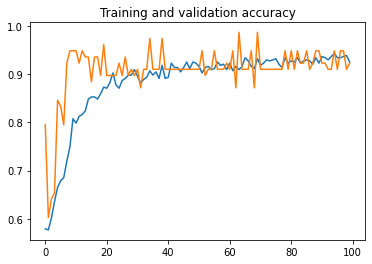

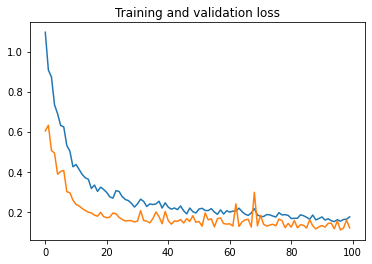

In [42]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

**Plotting Confusion Matrix**

In [43]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[26  5]
 [ 1 46]]


0.9230769230769231

In [44]:
def normalized_confusion_matrix(y_test, conf_mat, model):
    _ , counts = np.unique(y_test,return_counts=True)
    conf_mat = conf_mat/counts
    plt.figure(figsize=(6,5))
    ax=sns.heatmap(conf_mat,fmt='.2f',annot=True,annot_kws={'size':20},lw=2, cbar=True, cbar_kws={'label':'% Class accuracy'})
    plt.title(f'Confusion Matrix ({model})',size=22)
    plt.xticks(size=20)
    plt.yticks(size=20)
    ax.figure.axes[-1].yaxis.label.set_size(20) ##colorbar label
    cax = plt.gcf().axes[-1]  ##colorbar ticks
    cax.tick_params(labelsize=20) ## colorbar ticks
    plt.savefig(f'confusion-matrix-{model}.png',dpi=300)

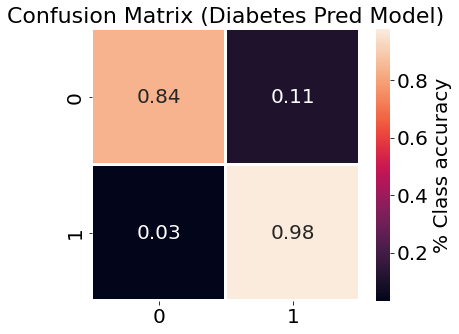

In [45]:
conf_mat = confusion_matrix(y_test,y_pred)
normalized_confusion_matrix(y_test,conf_mat, 'Diabetes Pred Model')

In [46]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               2176      
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 32)                4128      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
 flatten (Flatten)           (None, 1)                 0         
                                                                 
Total params: 6,337
Trainable params: 6,337
Non-traina

**Save the Model**

In [47]:
tf.saved_model.save(
    model,
    export_dir = "/tmp/myModel",
)

INFO:tensorflow:Assets written to: /tmp/myModel/assets


In [48]:
model.save('/tmp/myModel/mymodel.h5')

In [49]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               2176      
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 32)                4128      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
 flatten (Flatten)           (None, 1)                 0         
                                                                 
Total params: 6,337
Trainable params: 6,337
Non-traina

In [ ]:
pickle.dump(model,open('model.pkl','wb'))

INFO:tensorflow:Assets written to: ram://5172d3cb-201c-4b99-b2b8-55c6b8cb91fe/assets


In [ ]:
model = pickle.load(open('model.pkl','rb'))